# Classification model using Random Forest

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

### 2. Upload RNA data

In [2]:
path ='../../../../Data_preprocessing//RNA post_autoencoder+Clinic joined/Clinical_data_and_RNA_15_Features_PFS.csv'
data = pd.read_csv(path)
data.head(5)

,Unnamed: 0,RNA_ID,Age,Sarc,Rhab,Number_of_Prior_Therapies,Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy,Tumor_Shrinkage,PFS,TM_TC_Ratio,...,IL25,LANCL1-AS1,LEMD1,PCMT1,RP11-120J4.1,RP11-374M1.2,SDR42E1,TARBP2,TRIM43B,VN2R17P
0,0,G138701_RCCBMS-00097-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,5.490411,1.374775,...,0.693666,0.817111,0.678721,0.936250,0.663654,0.786407,1.000000,0.912529,0.587310,0.863040
1,1,G138701_RCCBMS-00099-T_v1_RNA_OnPrem,62.0,0.0,0.0,3.0,707.0,0.0,1.249315,1.374775,...,0.693666,0.817111,0.926248,0.958908,0.663654,0.786407,0.694015,0.903036,0.587310,0.863040
2,2,G138701_RCCBMS-00163-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,5.654795,1.374775,...,0.693666,0.817111,0.880799,0.922139,0.663654,0.786407,0.869025,0.898032,0.587310,0.863040
3,3,G138701_RCCBMS-00116-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,1.216438,1.374775,...,0.686828,0.794290,0.894078,0.921230,0.650857,0.772962,0.931136,0.873870,0.564337,0.855268
4,4,G138701_RCCBMS-00136-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,2.860274,1.374775,...,0.689921,0.983649,0.802636,0.929383,0.793946,0.776255,0.902087,0.896762,0.552830,0.857563


In [3]:
X = data[['DLGAP4', 'EIF4A1P9', 'FAM172BP', 'GJA9', 'GPR155', 'IL25', 'LANCL1-AS1', 'LEMD1', 'PCMT1', 'RP11-120J4.1', 'RP11-374M1.2', 'SDR42E1', 'TARBP2', 'TRIM43B', 'VN2R17P']] #Seleccionamos todas las columnas quitando la columna Unnamed (id de la fila ) y la columna Target.
Y = []
for i in range (len(data)):
    if data.PFS[i]<3: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    elif data.PFS[i]<6:
        Y.append(1)
    else:
        Y.append(2)
print(X)

       DLGAP4  EIF4A1P9  FAM172BP      GJA9    GPR155      IL25  LANCL1-AS1  \
0    0.909389  0.758691  0.716166  0.896883  0.975184  0.693666    0.817111   
1    0.909006  0.758691  0.716166  0.889567  0.916681  0.693666    0.817111   
2    0.969120  0.954047  0.716166  0.841131  0.901183  0.693666    0.817111   
3    0.936171  0.877898  0.865741  0.814810  0.912616  0.686828    0.794290   
4    0.958324  0.746849  0.702019  0.858627  0.922559  0.689921    0.983649   
..        ...       ...       ...       ...       ...       ...         ...   
139  0.946660  0.772952  0.903675  0.813319  0.955335  0.705406    0.997101   
140  0.943755  0.758691  0.716166  0.923364  0.929802  0.693666    0.817111   
141  0.921780  0.746849  0.702019  0.909013  0.979008  0.689921    0.802026   
142  0.958130  0.839283  0.702019  0.879108  0.915714  0.689921    0.802026   
143  0.934254  0.746849  0.702019  0.895707  0.920675  0.773156    0.945620   

        LEMD1     PCMT1  RP11-120J4.1  RP11-374M1.2

### 3. Train-Test dataset split

In [4]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.2, random_state=125)

print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 115
Target column size of the training set: 115
Test set size: 29
Target column size of the test set: 29


### 4. Select the parameters of the model and fit it

In [5]:
param_grid = {'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 3, 4, 5],
              'random_state':[125],
              'n_estimators': [10, 20],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy'],
              'max_depth':[None, 2, 5, 10,50]
              }

# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation.
clf = GridSearchCV(
        estimator  = RandomForestClassifier(),
        param_grid = param_grid,
        cv=5
       )

clf.fit(XTrain , yTrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 5, 10, 50],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [10, 20], 'random_state': [125]})

In [6]:
print("Best estimate of parameters according to GridSearchCV:")
model = clf.best_estimator_
# Fit the model with the best parameters
model.fit(XTrain , yTrain)

Best estimate of parameters according to GridSearchCV:


RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=3,
                       n_estimators=10, random_state=125)

In [7]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))

Best result of the cross validation of the model with the best paramters:0.5913043478260869


### 5. Prediction

In [8]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(XTrain)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [9]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(XTest)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (yhatTest[i] == yTest[i]):
        contTest = contTest + 1

In [10]:
print('Final accuracy on the training dataset: ' + str(contTrain/len(yTrain)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(yTest)))

Final accuracy on the training dataset: 0.9565217391304348
Final accuracy on the testing dataset: 0.4827586206896552


In [11]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[66  0  0]
 [ 2 24  1]
 [ 2  0 20]]
Input data:  [0 0 2 2 0 1 0 1 1 1 0 1 0 0 0 0 2 0 0 1 0 0 0 0 0 2 2 2 0 0 0 2 1 0 0 0 2
 1 0 0 0 0 2 1 1 0 1 0 1 0 0 2 1 2 0 0 0 0 1 0 2 2 1 0 0 0 0 2 0 2 2 0 0 0
 0 2 1 0 0 1 1 0 2 0 0 0 0 2 1 1 0 0 2 1 0 2 0 1 1 0 2 0 0 0 1 0 1 0 0 0 1
 0 1 0 0]
Prediction:        [0 0 0 2 0 1 0 1 1 1 0 1 0 0 0 0 2 0 0 1 0 0 0 0 0 2 2 2 0 0 0 2 1 0 0 0 0
 1 0 0 0 0 2 1 1 0 1 0 1 0 0 2 1 2 0 0 0 0 1 0 2 2 2 0 0 0 0 2 0 2 2 0 0 0
 0 2 1 0 0 1 1 0 2 0 0 0 0 2 1 1 0 0 2 1 0 2 0 1 1 0 2 0 0 0 0 0 1 0 0 0 1
 0 0 0 0]


In [12]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        66
           1       1.00      0.89      0.94        27
           2       0.95      0.91      0.93        22

    accuracy                           0.96       115
   macro avg       0.97      0.93      0.95       115
weighted avg       0.96      0.96      0.96       115



In [13]:
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix(yTest,yhatTest))
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[14  1  4]
 [ 4  0  0]
 [ 6  0  0]]
Input data:  [2 0 2 0 0 2 2 0 2 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 2 0 0 1 0]
Prediction:        [0 1 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 2 0 0 0]


In [14]:
print(classification_report(yTest,yhatTest))

              precision    recall  f1-score   support

           0       0.58      0.74      0.65        19
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         6

    accuracy                           0.48        29
   macro avg       0.19      0.25      0.22        29
weighted avg       0.38      0.48      0.43        29



Features with relevance over 0:  15
Features with relevance over 0.04:  10


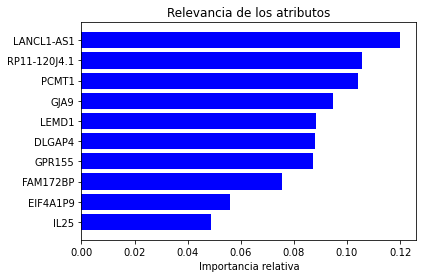

DLGAP4 = 0.08799762675530538
EIF4A1P9 = 0.0558239157705375
FAM172BP = 0.0753508918470196
GJA9 = 0.09465489407740874
GPR155 = 0.08709122034476342
IL25 = 0.04893263383893346
LANCL1-AS1 = 0.028467070458959697
LEMD1 = 0.026623728092030383
PCMT1 = 0.12008972252345071
RP11-120J4.1 = 0.026469750399529205
RP11-374M1.2 = 0.02653510798064246
SDR42E1 = 0.08825102686990867
TARBP2 = 0.10434103589212412
TRIM43B = 0.1057652563648121
VN2R17P = 0.023606118784574304


In [15]:
# Mediante el modelo creado podemos ver qué atributos son los más significativos para toamr una decisión.
# Los atributos conmyor relevancia serán los que estén colocados en la cima del árbol.
features = list(X)
importances = model.feature_importances_

elems_over_0 = np.fromiter((element for element in importances if element > 0), dtype = importances.dtype)
print('Features with relevance over 0: ', len(elems_over_0))

newArray = np.fromiter((element for element in importances if element > 0.04), dtype = importances.dtype)
importances=newArray
indices = np.argsort(importances)
print('Features with relevance over 0.04: ', len(newArray))

plt.title('Relevancia de los atributos')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importancia relativa')
plt.show()

for name, importance in zip(X, model.feature_importances_):
    print(name, "=", importance)
# Los atributos que cuya relevancia es 0, no serán necesarios para realizar la predicción del target.